## Assignment #1 Supervised Learning

### Dataset_1: Customer Churn Prediction

I found this dataset from Kaggle. The data contains information of 7043 Telco customers with 21 different attributes. Customers who left within the last month – the column is called Churn.  The classification goal is to predict customer churn (yes/no) based on the attributes provided. 

The attributes contains:
1. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
2. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
3. Demographic info about customers – gender, age range, and if they have partners and dependents. 

Telco Customer Dataset contains both type variables 'Categorical' and 'Numerical'.¶


### Dataset_2 Client Subscribe Prediction

This dataset is taken from UCI : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.¶

Categorical Columns
* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* deposit - (Yes/No)
* Default - (Yes/No)

Numerical Columns
* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

### Methodology

For the assignment, the requirement is that we need to use the following algorithm to train the data and compare the difference between them

1. Decision trees with some form of pruning
2. Neural networks
3. Boosting
4. Support Vector Machines
5. k-nearest neighbors

### Classification Problems

Dataset_1: Based on a customer's attributes to predict whether he or she will churn.

Dataset_2: Based on the customer's attributes to predict whether he or she will make purchase on black friday.

### Load Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os


sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier as gbm
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV



### 1. Dataset_1 Preprocessing

#### 1.1 Load Dataset

In [2]:
df_1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

This dataset have 7043 samples, with 21 attributes. Some of the columns are numerical data types, while some are categorical types. For the categorical datatypes, we need to use one-hot-encoder to tranform them into numerical datatype.

#### 1.2 Data Preprocessing

In [5]:
# drop the customerId column and convert the datatype of TotalCharge to Numerical dataset
df_1.drop(['customerID'], axis=1, inplace=True)
df_1.TotalCharges = pd.to_numeric(df_1.TotalCharges, errors = 'coerce')

In [6]:
df_1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# There are 11 missing values for the total charges, therefore we need to drop those na values
df_1.dropna(inplace = True)

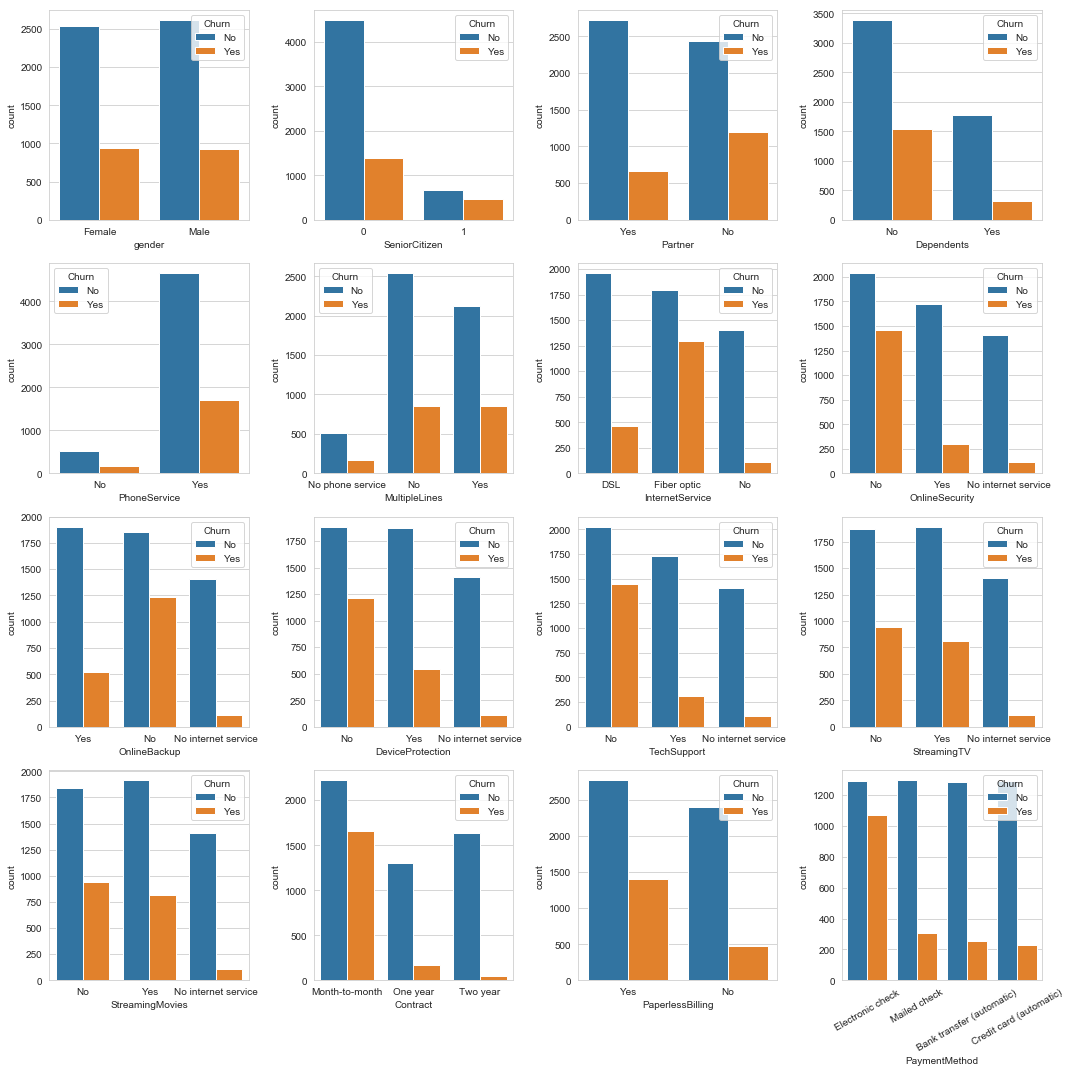

In [8]:
#Plotting with categorical data¶
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

ax = ax.ravel()
cat_cols = df_1.drop(columns = ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'])
for i in range(len(cat_cols.columns)):
    g = sns.countplot(x=cat_cols.columns[i], hue="Churn", data=df_1, ax = ax[i])
    if i == 15:
        g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.tight_layout()    
plt.show()

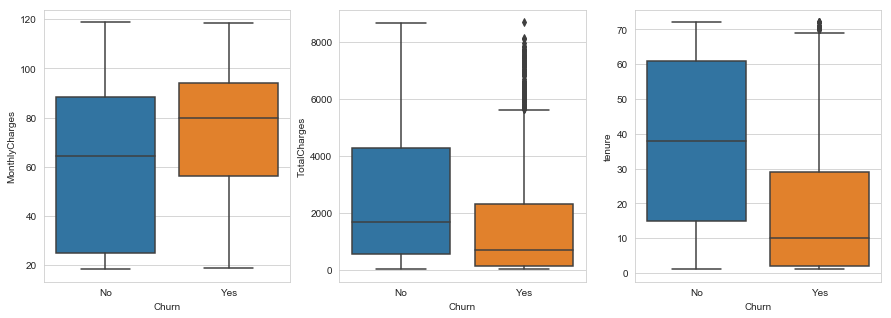

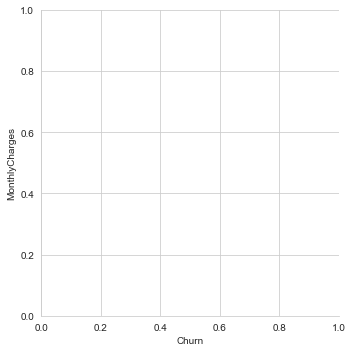

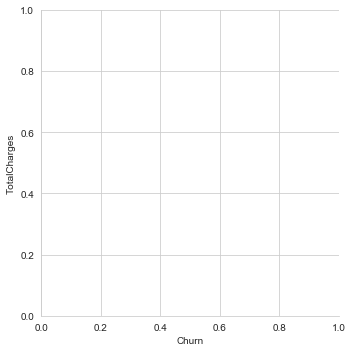

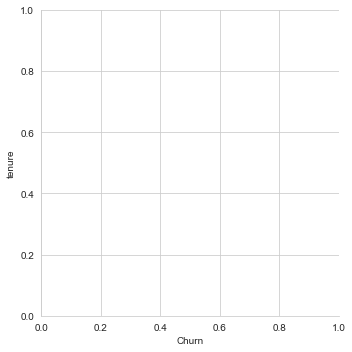

In [9]:
# Ploting of continuous numerical data distribution
#cat_cols = df_1.drop(columns = ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'])

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
axes = axes.ravel()

g1 = sns.catplot(x= "Churn", y="MonthlyCharges", data=df_1, kind = 'box', ax = axes[0])
g1 = sns.catplot(x= "Churn", y="TotalCharges", data=df_1, kind = 'box', ax = axes[1])
g1 = sns.catplot(x= "Churn", y="tenure", data=df_1, kind = 'box', ax = axes[2])


In [10]:
df_1 = pd.get_dummies(data=df_1, columns=['gender'])
# convery the binary categorical dataset to numerical dataset
df_1['Churn'].replace(('Yes', 'No'), (1, 0), inplace = True)
df_1['Partner'].replace(('Yes', 'No'), (1, 0), inplace = True)
df_1['Dependents'].replace(('Yes', 'No'), (1, 0), inplace = True)
df_1['PhoneService'].replace(('Yes', 'No'), (1, 0), inplace = True)
df_1['PaperlessBilling'].replace(('Yes', 'No'), (1, 0), inplace = True)

df_1['MultipleLines'].replace('No phone service','No', inplace=True)
df_1['MultipleLines'].replace(('Yes', 'No'), (1, 0), inplace = True)


df_1['Has_InternetService'] = df_1['InternetService'].map(lambda s :0  if s =='No' else 1)
df_1['Fiber_optic'] = df_1['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df_1['DSL'] = df_1['InternetService'].map(lambda s :1  if s =='DSL' else 0)
df_1.drop(['InternetService'], axis=1, inplace=True)

df_1['OnlineSecurity'] = df_1['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
df_1['OnlineBackup'] = df_1['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
df_1['DeviceProtection'] = df_1['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
df_1['TechSupport'] = df_1['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
df_1['StreamingTV'] = df_1['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
df_1['StreamingMovies'] = df_1['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)


df_1 = pd.get_dummies(data=df_1, columns=['PaymentMethod'])
df_1 = pd.get_dummies(data=df_1, columns=['Contract'])


In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
tenure                                     7032 non-null int64
PhoneService                               7032 non-null int64
MultipleLines                              7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
PaperlessBilling                           7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalChar

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

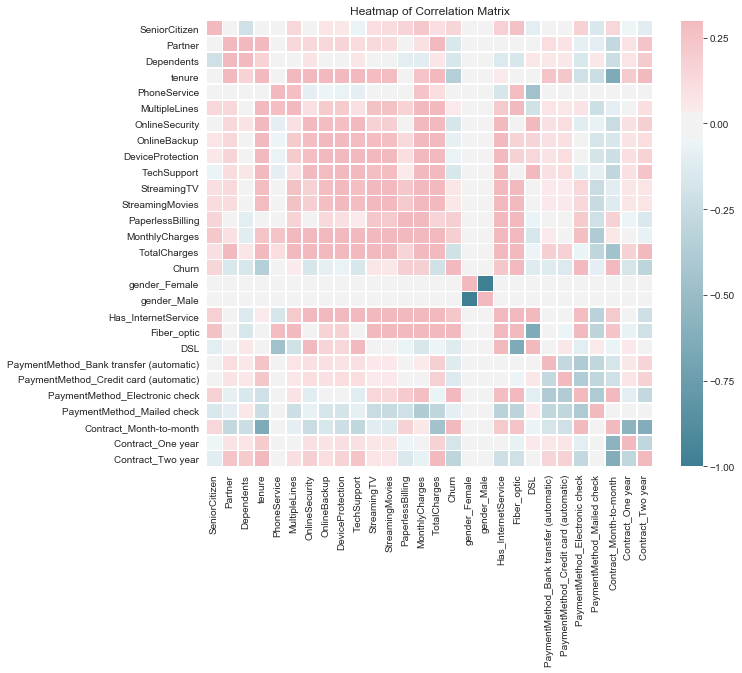

In [12]:
corr = df_1.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

#### 1.3 Split into Training and Testing Dataset

In [13]:
y_1 = df_1['Churn'].values
X_1 = df_1.drop(columns = ['Churn'])

scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 101)

### 2. Dataset_2 Preprocessing

#### 2.1 Load Dataset

In [15]:
df_2 = pd.read_csv('bank.csv')

In [16]:
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### 2.2 Data Preprocessing

In [18]:
df_2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [19]:
df_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

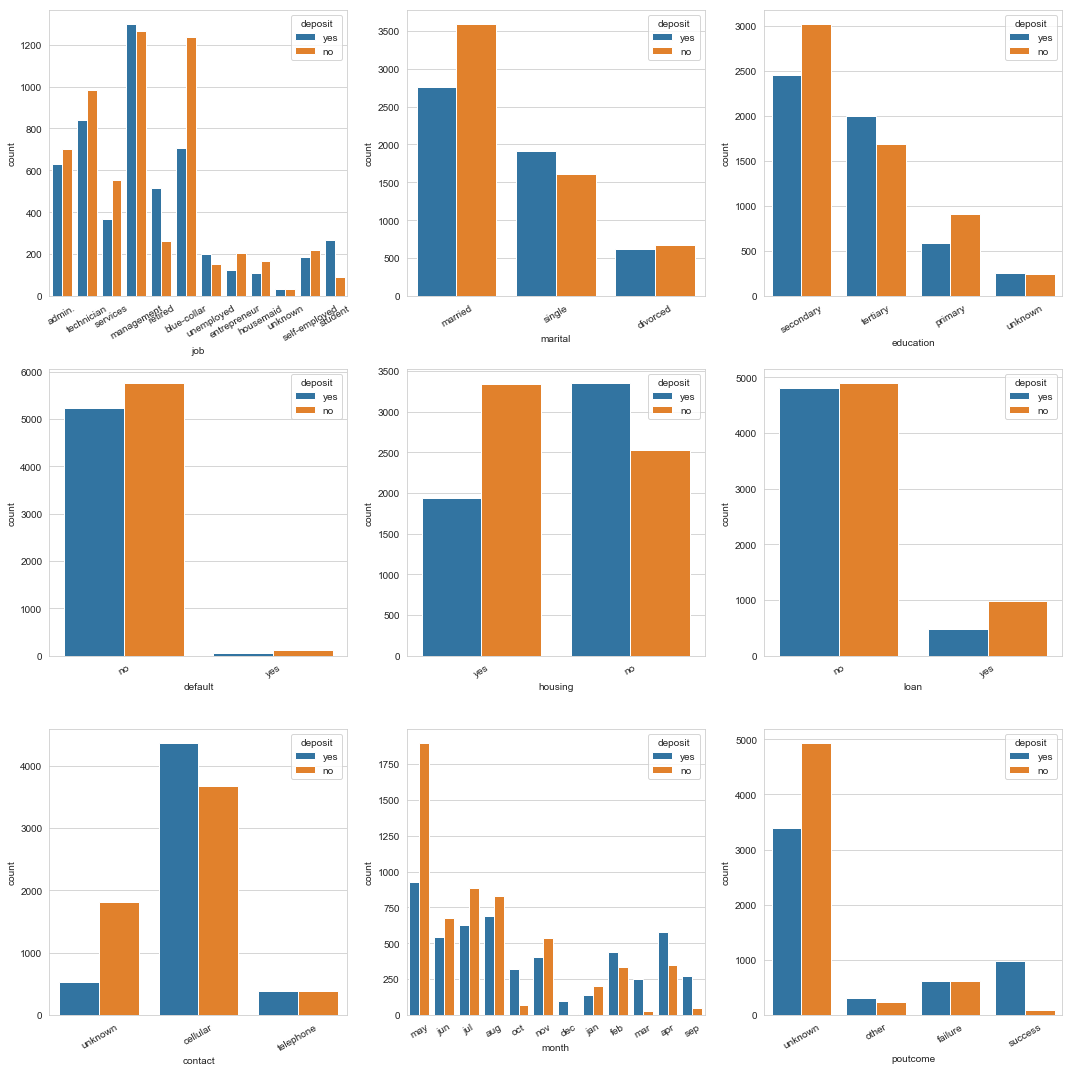

In [20]:
#Plotting with categorical data¶
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

ax = ax.ravel()
cat_cols = df_2.drop(columns = ['deposit', 'balance', 'duration', 'pdays', 'age', 'day', 'campaign', 'previous'])
for i in range(len(cat_cols.columns)):
    g = sns.countplot(x=cat_cols.columns[i], hue="deposit", data=df_2, ax = ax[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.tight_layout()    
plt.show()
    

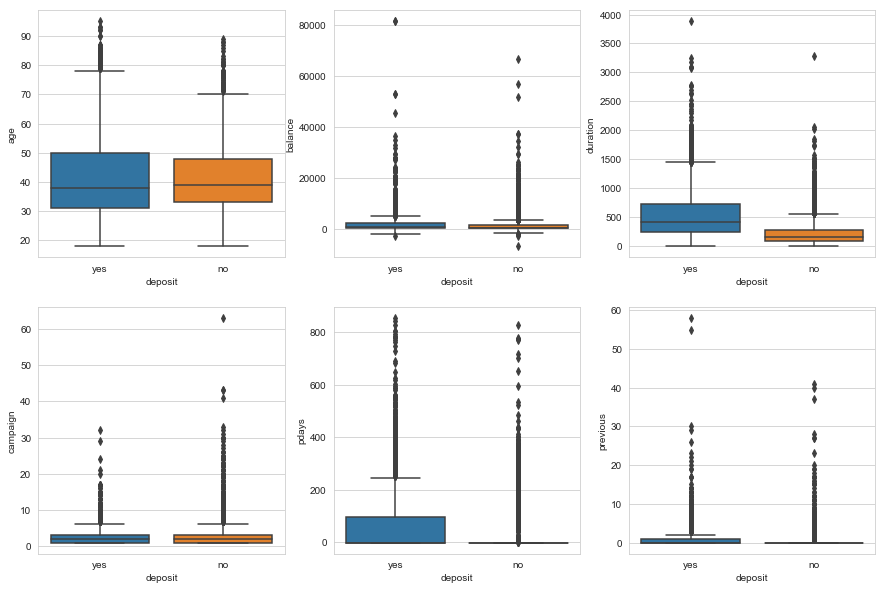

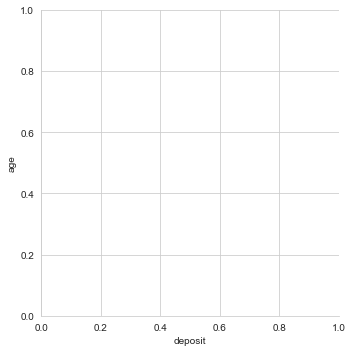

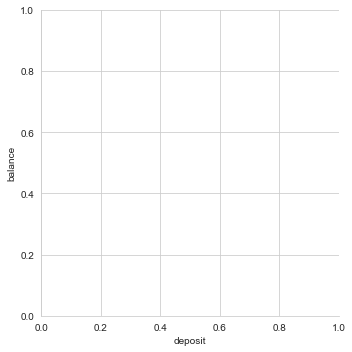

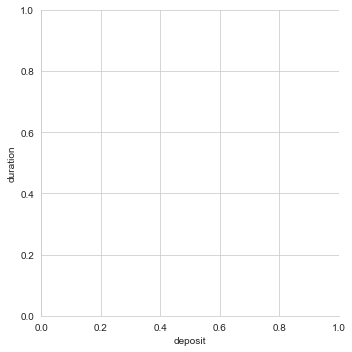

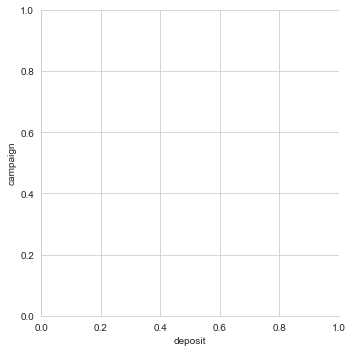

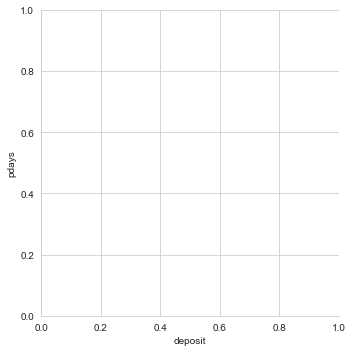

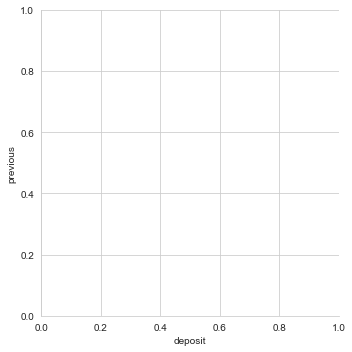

In [21]:
# Ploting of continuous numerical data distribution

fig, axes = plt.subplots(2, 3, figsize = (15, 10))

g1 = sns.catplot(x= "deposit", y="age", data=df_2, kind = 'box', ax = axes[0, 0]);
g2 = sns.catplot(x = "deposit", y = "balance", data = df_2, kind = 'box', ax = axes[0, 1])
#g2 = sns.catplot(x = "deposit", y = "day", data = df_2, ax = axes[0, 2])

g3 = sns.catplot(x = "deposit", y = "duration", data = df_2, kind = 'box', ax = axes[0, 2])
g4 = sns.catplot(x = "deposit", y = "campaign", data = df_2, kind = 'box', ax = axes[1, 0])

g4 = sns.catplot(x = "deposit", y = "pdays", data = df_2, kind = 'box', ax = axes[1, 1])
g4 = sns.catplot(x = "deposit", y = "previous", data = df_2, kind = 'box', ax = axes[1, 2])



In [22]:
df_2 = df_2.drop(['day','poutcome'],axis=1)

df_2.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
df_2.default.replace(('yes','no'),(1,0),inplace=True)
df_2.housing.replace(('yes','no'),(1,0),inplace=True)
df_2.loan.replace(('yes','no'),(1,0),inplace=True)
df_2.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
df_2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    

In [23]:
# convert the duration from Seconds to Minutes and then making it as categorical feature.
# Converting the age of the person into categorical feature by segregating the age as Adult , Middle Aged and old.
# Similarly we can converting the continous feature value into discrete feature value.


def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0 
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    data.loc[data['age'] >=61,'old'] = 1

    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

df_2 = campaign_(df_2)
df_2 = age_(df_2)
df_2 = education_(df_2)
df_2 = balance_(df_2)
df_2 = job_(df_2)
df_2 = previous_(df_2)
df_2 = duration_(df_2)
df_2 = pdays_(df_2)
df_2 = marital_(df_2)


In [24]:
df_2 = df_2.drop(columns = ['balance','previous','pdays','age','duration','education','marital'],axis=1)

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 28 columns):
job                    11162 non-null int64
default                11162 non-null int64
housing                11162 non-null int64
loan                   11162 non-null int64
contact                11162 non-null int64
month                  11162 non-null int64
campaign               11162 non-null int64
deposit                11162 non-null int64
Adult                  11162 non-null int64
Middle_Aged            11162 non-null int64
old                    11162 non-null int64
primary                11162 non-null int64
secondary              11162 non-null int64
tertiary               11162 non-null int64
unknown                11162 non-null int64
Neg_Balance            11162 non-null int64
No_Balance             11162 non-null int64
Pos_Balance            11162 non-null int64
Not_Contacted          11162 non-null int64
Contacted              11162 non-null int64
t_min      

#### 2.3 Split into Training and Testing Dataset

In [26]:
X_2 = df_2.drop(columns = ['deposit'])
y_2 = df_2.deposit

scaler = StandardScaler()
X_2_sc = scaler.fit_transform(X_2)


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 50)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

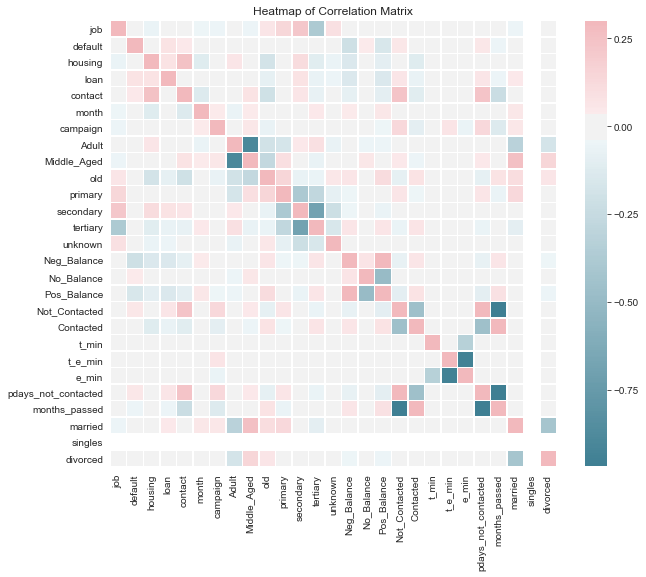

In [27]:
corr = X_2.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

## Decision Tree

1. Information gain (based on entropy) to determine the best feature split 
2. Pre-pruned by limiting tree depth using the hyperparameter 'max_depth' and by ensuring that each leaf (a terminal node on the tree) has at least 'min_samples_leaf'.

#### Visualize Decision Tree

In [28]:
dtree_1 = DecisionTreeClassifier(max_depth = 3, criterion="entropy",splitter="best")
dtree_1.fit(X_train_1, y_train_1)
y_pred_1 = dtree_1.predict(X_test_1)
metrics.accuracy_score(y_test_1, y_pred_1)

0.7981520966595593

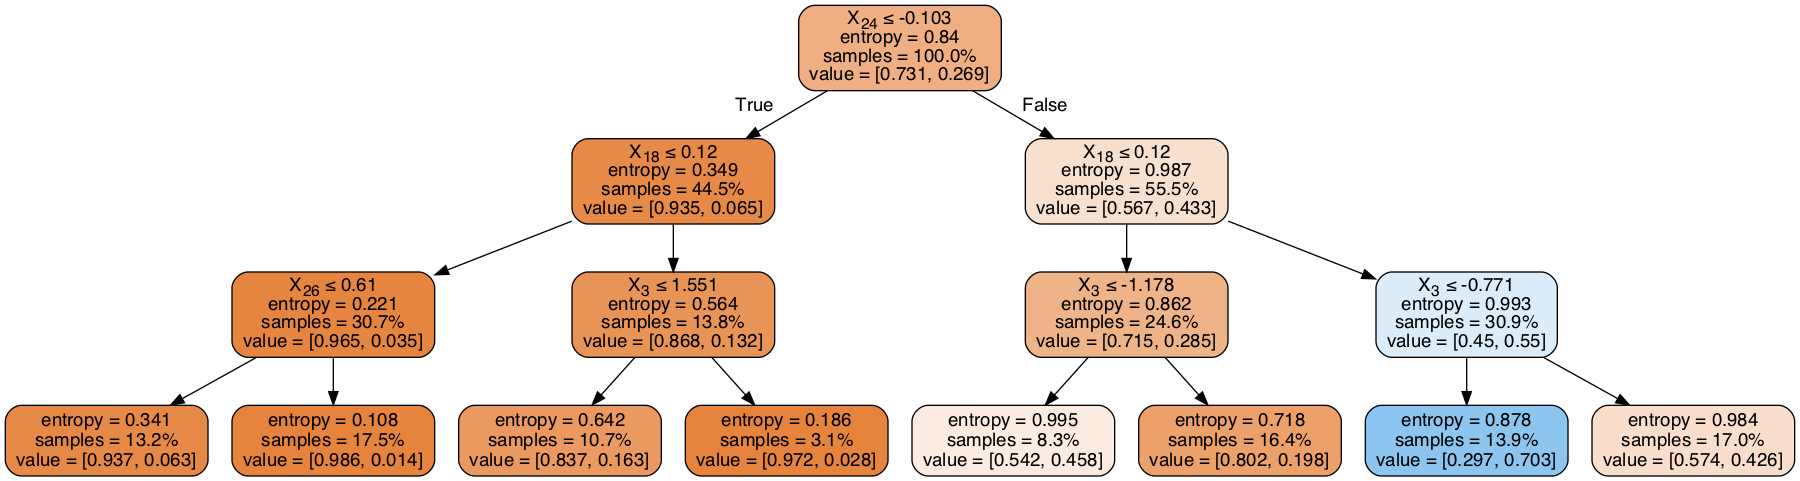

In [29]:
dot_data = StringIO()
export_graphviz(dtree_1,out_file=dot_data,
                         filled=True, rounded=True, special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Tuning max_depth of the tree

In [30]:

def AUC_ROC(depth, X_train, y_train, X_test, y_test, label):
    plt.figure(figsize = (8, 6))
    for i in range(1,depth):
        clf = DecisionTreeClassifier(max_depth=i, criterion='entropy')
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = 'depth = %0.0f' % i)

    plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics of Dataset_{}'.format(label), fontsize = 16)
    plt.legend(loc = 'lower right')
    plt.show()


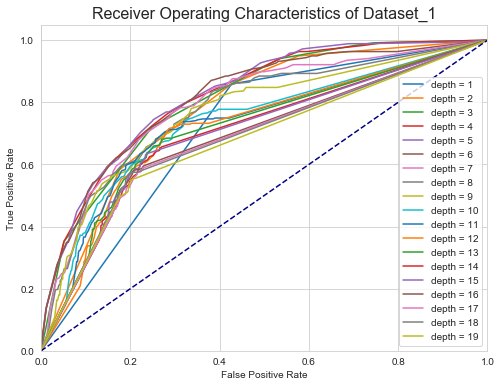

In [31]:
depth = 20
AUC_ROC(depth, X_train_1, y_train_1, X_test_1, y_test_1, 1)

In [32]:
def TreeDepth(max_depth, X_train, y_train, X_test, y_test, label):
    tree_auc_trn, tree_auc_tst = np.zeros(max_depth), np.zeros(max_depth)
    plt.figure(figsize = (8, 6))
    for i in range(1,depth):
        clf = DecisionTreeClassifier(max_depth=i, criterion='entropy')
        clf = clf.fit(X_train, y_train)
        tree_auc_tst[i] = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
        tree_auc_trn[i] = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])

    plt.plot(tree_auc_tst, 'o-', linewidth=3, label = "Decision tree test AUC")
    plt.plot(tree_auc_trn, 'o-', linewidth=3, label = "Decision tree train AUC")
    plt.title("Decision Tree Depth of Dataset_{}".format(label), fontsize = 18)
    plt.legend(fontsize = 14)
    plt.ylim(0, 1.0)
    plt.xlabel("Max_depth", fontsize = 14)
    plt.ylabel("validation auc", fontsize = 14)
    plt.figure(figsize=(16,16))
    plt.show()

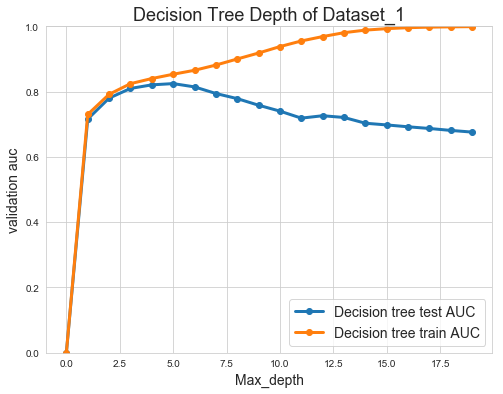

<Figure size 1152x1152 with 0 Axes>

In [33]:
depth = 20
TreeDepth(depth, X_train_1, y_train_1, X_test_1, y_test_1, 1)

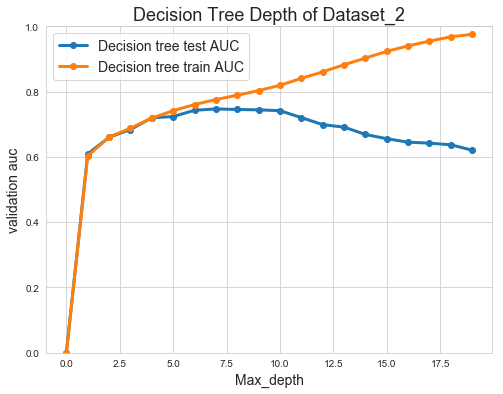

<Figure size 1152x1152 with 0 Axes>

In [34]:
TreeDepth(depth, X_train_2, y_train_2, X_test_2, y_test_2, 2)

#### Using GredSearch to Get Optimal Paramters

In [35]:
def TreeGridSearchCV(X_train, y_train):
    #parameters to search:
    #20 values of min_samples leaf from 0.5% sample to 5% of the training data
    #20 values of max_depth from 1, 20
    start_leaf_n = round(0.005*len(X_train))
    end_leaf_n = round(0.05*len(X_train))
    param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'), 'max_depth':np.arange(1,20)}

    tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=10, scoring = 'roc_auc')
    tree.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(tree.best_params_)
    return tree.best_params_['max_depth'], tree.best_params_['min_samples_leaf']


### Optimal Hyperparamter for Dataset_1

In [36]:
max_depth, min_samples_leaf = TreeGridSearchCV(X_train_1,y_train_1)

Per Hyperparameter tuning, best parameters are:
{'max_depth': 5, 'min_samples_leaf': 135}


roc_auc_score of train dataset: 0.8476214216650434
roc_auc_score of test dataset: 0.8275236973169818


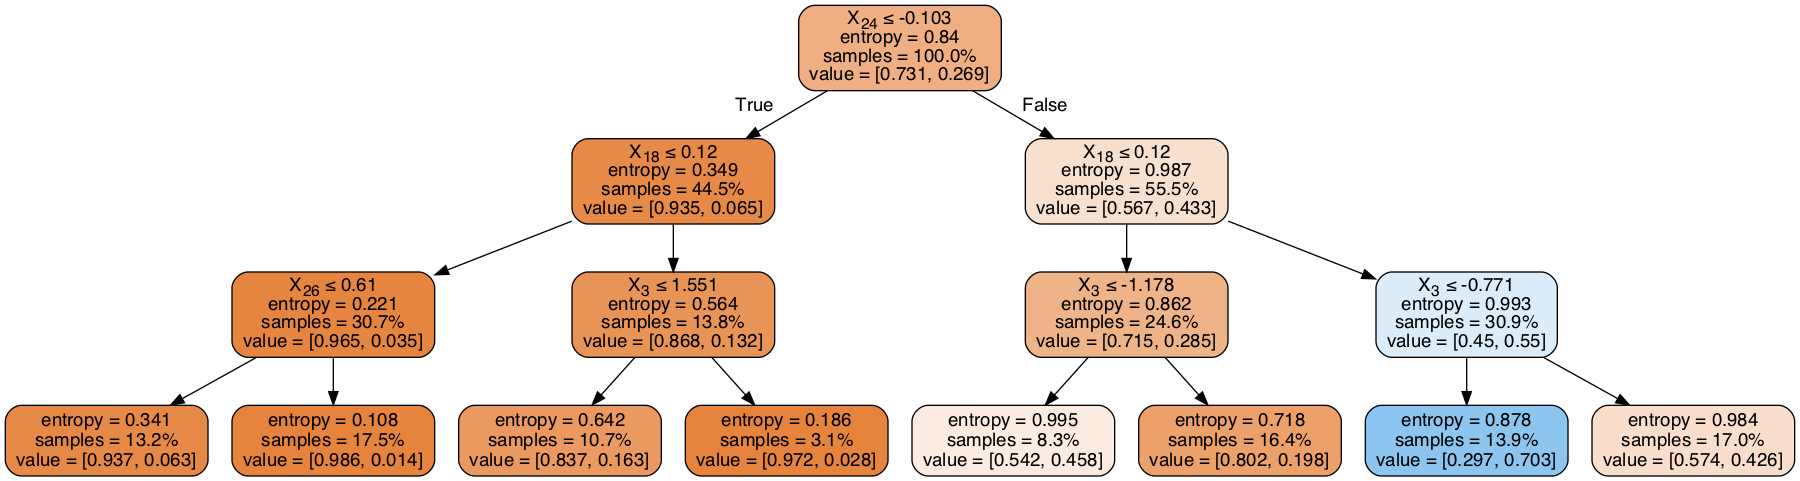

In [37]:
# Visualize the trained Desicion Tree of Dataset_1

dtree = DecisionTreeClassifier(max_depth = 5, criterion="entropy",splitter="best", min_samples_leaf = 135)
dtree.fit(X_train_1, y_train_1)
y_pred_1 = dtree_1.predict(X_test_1)
metrics.accuracy_score(y_test_1, y_pred_1)

tree_auc_tst = roc_auc_score(y_test_1, dtree.predict_proba(X_test_1)[:,1])
tree_auc_trn = roc_auc_score(y_train_1, dtree.predict_proba(X_train_1)[:,1])

print('roc_auc_score of train dataset: {}'.format(tree_auc_trn))
print('roc_auc_score of test dataset: {}'.format(tree_auc_tst))

dot_data = StringIO()
export_graphviz(dtree_1,out_file=dot_data,
                         filled=True, rounded=True, special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Optimal Hyperparamters for DataSet_2

In [38]:
max_depth, min_samples_leaf = TreeGridSearchCV(X_train_2,y_train_2)

Per Hyperparameter tuning, best parameters are:
{'max_depth': 7, 'min_samples_leaf': 108}


roc_auc_score of train dataset: 0.7610269516962412
roc_auc_score of test dataset: 0.7512586658945776


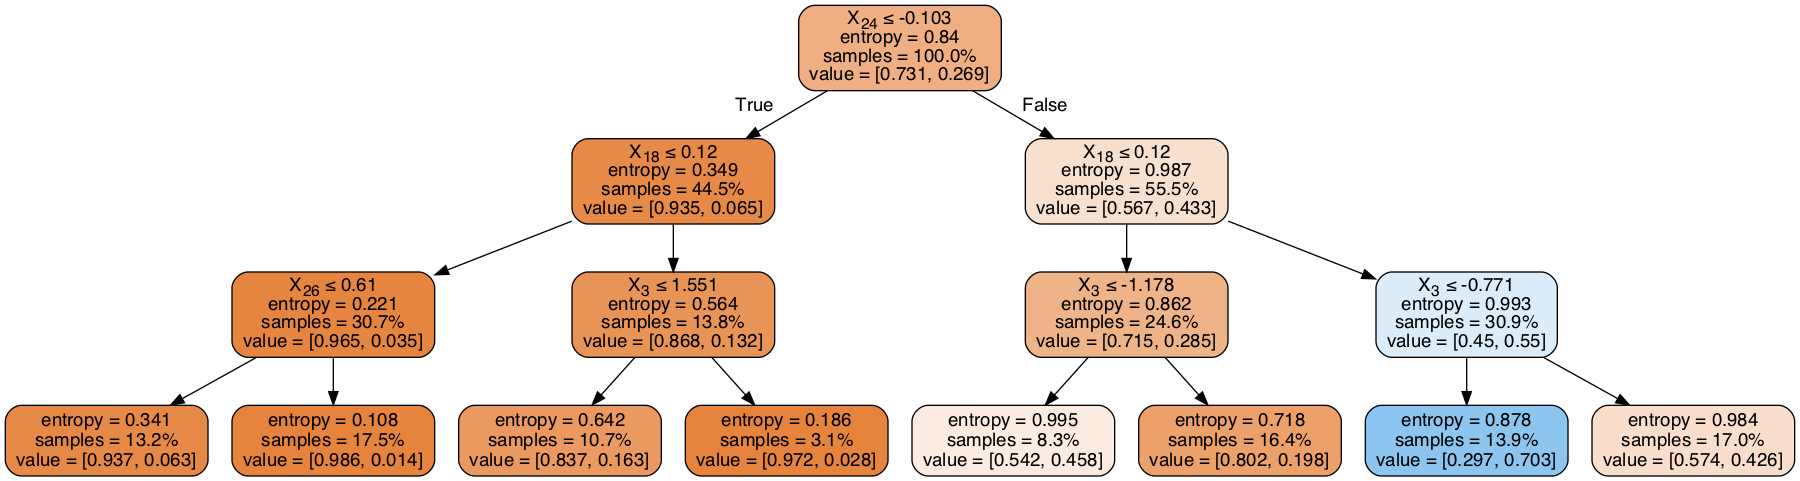

In [39]:
# Visualize the trained Desicion Tree of Dataset_1

dtree = DecisionTreeClassifier(max_depth = 7, criterion="entropy",splitter="best", min_samples_leaf = 108)
dtree.fit(X_train_2, y_train_2)
y_pred_2 = dtree_1.predict(X_test_2)
metrics.accuracy_score(y_test_2, y_pred_2)

tree_auc_tst = roc_auc_score(y_test_2, dtree.predict_proba(X_test_2)[:,1])
tree_auc_trn = roc_auc_score(y_train_2, dtree.predict_proba(X_train_2)[:,1])

print('roc_auc_score of train dataset: {}'.format(tree_auc_trn))
print('roc_auc_score of test dataset: {}'.format(tree_auc_tst))

dot_data = StringIO()
export_graphviz(dtree_1,out_file=dot_data,
                         filled=True, rounded=True, special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Boosting 

In [40]:
def gradient_boost(X_train, y_train, X_test, y_test, dataset):
    original_params = {'n_estimators': 50, 'random_state': 2}
    plt.figure(figsize = (8, 6))
    for label, color, setting in [('Depth 2, lr = 1.0', 'turquoise', {'learning_rate': 1.0, 'max_depth': 2}),
                                  ('Depth 4, lr = 1.0', 'cadetblue',      {'learning_rate': 1.0, 'max_depth': 4}),
                                  ('Depth 6, lr = 1.0', 'blue',      {'learning_rate': 1.0, 'max_depth': 6}),
                                  ('Depth 2, lr = 0.1', 'orange',    {'learning_rate': 0.1, 'max_depth': 2}),
                                  ('Depth 4, lr = 0.1', 'red',    {'learning_rate': 0.1, 'max_depth': 4}),
                                  ('Depth 6, lr = 0.1', 'purple',      {'learning_rate': 0.1, 'max_depth': 6})]:
        params = dict(original_params)
        params.update(setting)
        clf = gbm(**params)
        clf.fit(X_train, y_train)

        # compute test set auc
        test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
        for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
            test_deviance[i] = roc_auc_score(y_test, y_pred[:,1])
        
        # computer train set auc
        train_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
        for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
            train_deviance[i] = roc_auc_score(y_train, y_pred[:, 1])
            
        #print test auc
        plt.plot((np.arange(test_deviance.shape[0]) + 1), test_deviance,
                '-', color=color, label=label)

    plt.title('Gradient Boosting of Dataset_{}'.format(dataset), fontsize = 16)
    plt.legend(loc='lower right', fontsize = 14)
    plt.ylim(0.6, 0.9)
    plt.xlabel('Boosting Iterations', fontsize = 14)
    plt.ylabel("validation auc", fontsize = 14)
    plt.figure(figsize=(12,12))
    plt.show()
    print('The maximum test auc score obtained is {}'.format(max(test_deviance)))
    print('The maximum train auc score obtained is {}'.format(max(train_deviance)))
    print('')

### Gradient Boosting Result of Dataset_1

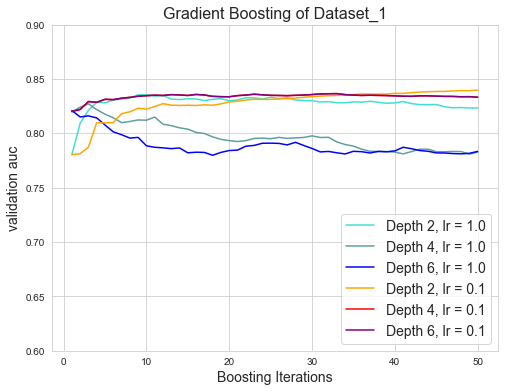

<Figure size 864x864 with 0 Axes>

The maximum test auc score obtained is 0.8365567932308681
The maximum train auc score obtained is 0.9399620408177694



In [41]:
gradient_boost(X_train_1, y_train_1, X_test_1, y_test_1, 1)

Smaller learning rate can get better result. Since the results between lr = 0.1 and lr = 0.01 are quite similar, we will pick lr = 0.1. 

### Gradient Boosting Result of Dataset_2

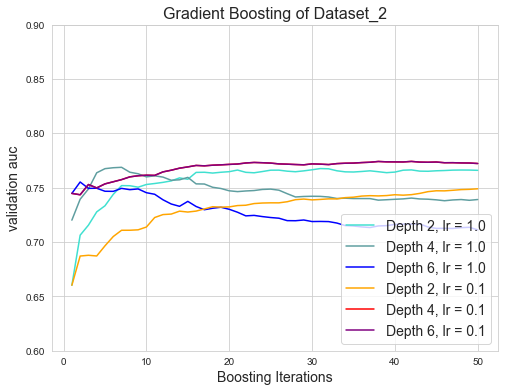

<Figure size 864x864 with 0 Axes>

The maximum test auc score obtained is 0.7741965449018
The maximum train auc score obtained is 0.8306824459280651



In [42]:
gradient_boost(X_train_2, y_train_2, X_test_2, y_test_2, 2)

### K Nearest Neighbors

In [86]:
def train_knn(X_train, y_train, X_test, y_test, dataset):
    kn = range(10,120,10)
    kauc_trn, kauc_tst = np.zeros(len(kn)), np.zeros(len(kn))
    kman_trn, kman_tst = np.zeros(len(kn)), np.zeros(len(kn))
    for i, k in zip(range(0, len(kn)), kn):
        # using Euclidean distance p = 2
        clf1 = KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, p=2, weights='uniform')
        clf1 = clf1.fit(X_train, y_train)
        pred_tst = clf1.predict_proba(X_test)[:,1]
        pred_trn = clf1.predict_proba(X_train)[:,1]
        kauc_tst[i] = roc_auc_score(y_test, pred_tst)
        kauc_trn[i] = roc_auc_score(y_train, pred_trn)
        # using manhatten distance p = 1
        clf2 = KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, p=1, weights='uniform') 
        clf2.fit(X_train, y_train)
        pred_tst_man = clf2.predict_proba(X_test)[:,1]
        pred_trn_man = clf2.predict_proba(X_train)[:,1]
        kman_tst[i] = roc_auc_score(y_test, pred_tst_man)
        kman_trn[i] = roc_auc_score(y_train, pred_trn_man)
    
        
    plt.figure(figsize = (8, 6))        

    plt.title('K Nearest Neighbor Training on Dataset_{}'.format(dataset), fontsize = 16)
    plt.plot(kn, kauc_tst, 'o-', linewidth=3, label = "KNN_Euclidean test AUC")
    plt.plot(kn, kauc_trn, 'o-', linewidth=3, label = "KNN_Euclidean train AUC")
    plt.plot(kn, kman_tst, 'o--', linewidth=3, label = "KNN_Manhattan test AUC")
    plt.plot(kn, kman_trn, 'o--', linewidth=3, label = "KNN_Manhattan train AUC")
    plt.legend(fontsize = 14)
    plt.ylim(0.5, 1.0)
    plt.xlabel("k Nearest Neighbors - Euclidean", fontsize = 14)
    plt.ylabel("validation auc", fontsize = 14)
    plt.show()
    print("Best test set auc is %0.3f" % kauc_tst.max(), "for %0.0f neighbors" % list(range(10, 120, 10))[kauc_tst.argmax()])

    

### KNN Traning on Dataset_1

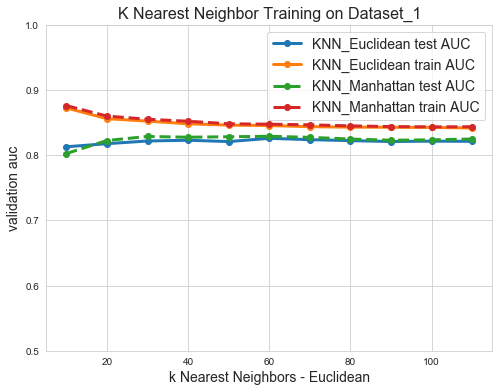

Best test set auc is 0.826 for 60 neighbors


In [87]:
train_knn(X_train_1, y_train_1, X_test_1, y_test_1, 1)

### KNN Training on Dataset_2

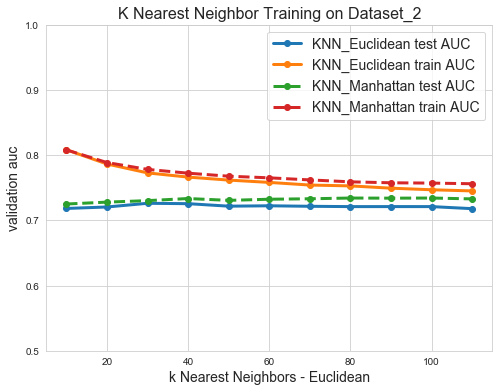

Best test set auc is 0.726 for 30 neighbors


In [88]:
train_knn(X_train_2, y_train_2, X_test_2, y_test_2, 2)

### Support Vector Machine

In [61]:
def training_svm(X_train, y_train, X_test, y_test, label):
    costs = np.power(10.0, range(-2,2))
    kernels = ['linear', 'poly', 'rbf']
    auc_rad_tst = np.zeros((len(costs),len(kernels)))
    auc_rad_trn = np.zeros((len(costs),len(kernels)))

    for i in range(len(costs)):
        for k in range(len(kernels)):
            svc = SVC(kernel = kernels[k], C=costs[i], probability=True, gamma = 'scale')
            svc.fit(X_train,y_train)
            auc_rad_tst[i,k] = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
            auc_rad_trn[i,k] = roc_auc_score(y_train, svc.predict_proba(X_train)[:,1])
    plt.figure(figsize = (10, 8))        
    for k in range(len(kernels)):
        plt.plot(auc_rad_tst[:,k], linewidth=3, label="Test AUC  : "+kernels[k])
    for k in range(len(kernels)):
        plt.plot(auc_rad_trn[:,k], '--', linewidth=3, label="Train AUC : "+kernels[k])
    plt.title('Support Vector Machine Training on Dataset_{}'.format(label), fontsize = 18)
    plt.legend(loc='best', fontsize = 14)
    plt.ylim(0.6, 1)
    np.set_printoptions(precision=3)
    plt.xticks(range(len(costs)),['0.001', '0.01','0.1', '1','10', '100','1000'])
    plt.xlabel("Costs", fontsize = 14)
    plt.ylabel("validation auc", fontsize = 14)
    plt.show()
    

### Support Vector Machine Training on Datase_1

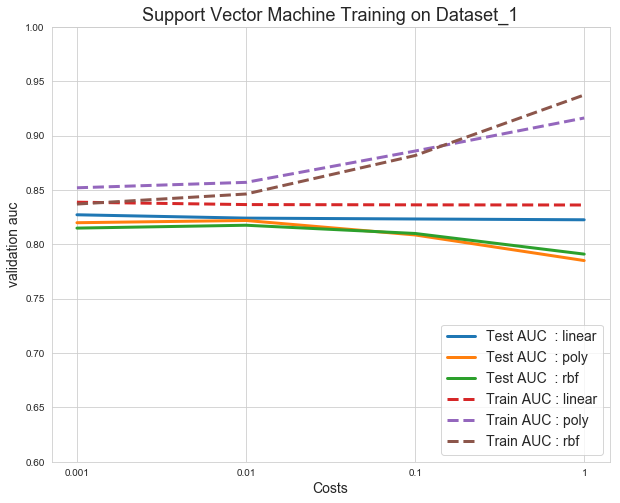

In [56]:
training_svm(X_train_1, y_train_1, X_test_1, y_test_1, 1)

### Support Vector Machine Training on Datase_2

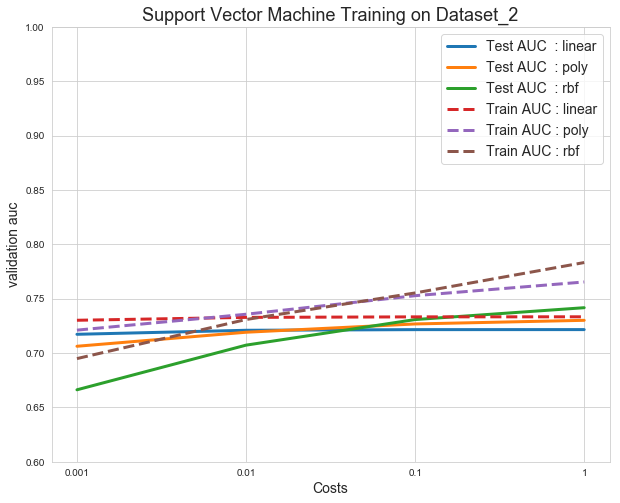

In [62]:
training_svm(X_train_2, y_train_2, X_test_2, y_test_2, 2)

### Learning Curves of Varrious Algorithm

In [137]:
from sklearn.model_selection import learning_curve

def plot_curve(clf, X, y, model_name, cv):
    
    train_sizes=np.linspace(.1, 1.0, 10)
        
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, n_jobs=-1, cv=cv, train_sizes=train_sizes, verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o--', color="g", label="Cross-validation score")
    
    plt.title('Learning Curve of {}'.format(model_name))
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("score")
    plt.ylim([0.6, 1.1])

    plt.show()
    


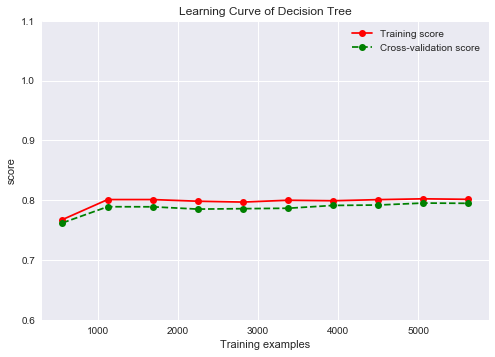

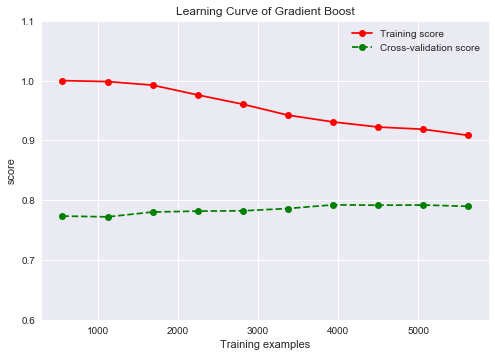

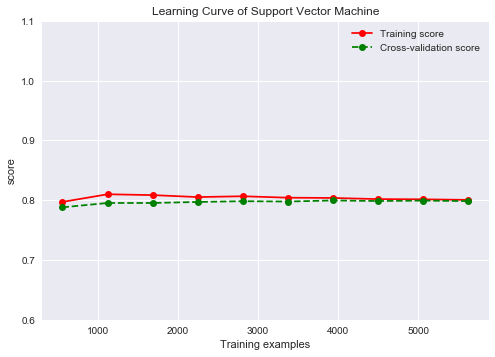

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A

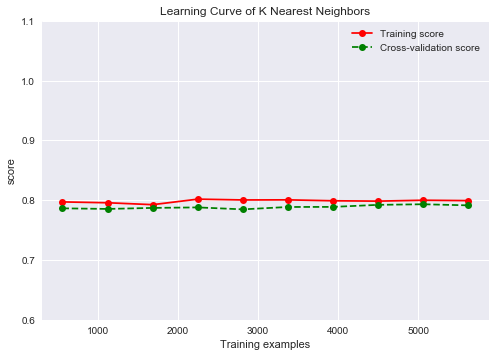

In [138]:
cv = 5

dtree = DecisionTreeClassifier(max_depth = 5, criterion="entropy",splitter="best", min_samples_leaf = 135)
boost = gbm(max_depth = 6, learning_rate = 0.1)
svc = SVC(kernel = 'linear', C= 0.01, probability=True, gamma = 'scale')
knn = KNeighborsClassifier(n_neighbors=60, algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, p=2, weights='uniform')
plot_curve(dtree, X_1, y_1, 'Decision Tree', cv)
plot_curve(boost, X_1, y_1, 'Gradient Boost', cv)
plot_curve(svc, X_1, y_1, 'Support Vector Machine', cv)
plot_curve(knn, X_1, y_1, 'K Nearest Neighbors', cv)

### Neural Network

In [186]:
from sklearn.neural_network import MLPClassifier


def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = [5, 10, 20, 30, 40, 50, 75, 100]
    learning_rates = [0.001, 0.01, 0.1]
    param_grid = [
        {
            'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)],
            'learning_rate_init' : learning_rates
        }
       ]

    net = GridSearchCV(estimator = MLPClassifier(random_state=100, tol = .001, activation = 'relu', solver = 'adam'),
                       param_grid=param_grid, cv=10)
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']


In [187]:
NNGridSearchCV(X_train_1, y_train_1)

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': (1,), 'learning_rate_init': 0.001}


((1,), 0.001)

In [188]:
NNGridSearchCV(X_train_2, y_train_2)

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': (16,), 'learning_rate_init': 0.01}


((16,), 0.01)

In [202]:

def n_iterations(X_train, y_train, X_test, y_test, epochs, title):
    
    
    val_auc2A, val_auc2B = [], []
    for i in range(1, epochs):
        clf = MLPClassifier(hidden_layer_sizes= 16, solver='adam', activation='relu', 
                                learning_rate_init=0.01, random_state=100, max_iter = i, tol = 0.001)
        clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_test)[:,1]
        val_auc2A.append(roc_auc_score(y_test,pred))
        pred = clf.predict_proba(X_train)[:,1]
        val_auc2B.append(roc_auc_score(y_train,pred))
    
    plt.plot(val_auc2A, '-', color='r', label='Test ROC_AUC Score')
    plt.plot(val_auc2B, '--', color = 'g', label='Train ROC_AUC Score')
    plt.title(title)
    
    
    plt.ylabel('validation auc score', fontsize = 14)
    plt.xlabel('Number of iterations/epochs', fontsize = 14)
    plt.ylim([0.5, 1.05])
    
    plt.legend(loc='best', fontsize = 14)
    plt.tight_layout()
    plt.show()
    

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

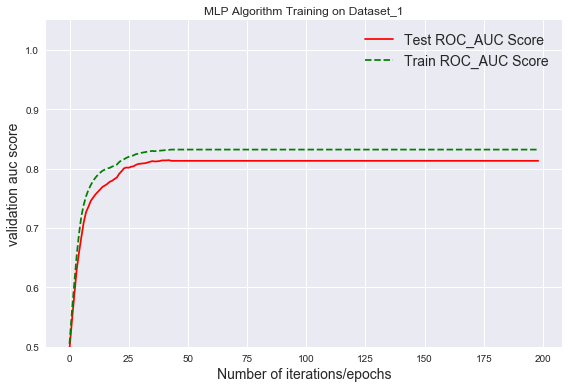

In [201]:
n_iterations(X_train_1, y_train_1, X_test_1, y_test_1, 200, 'MLP Algorithm Training on Dataset_1')

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

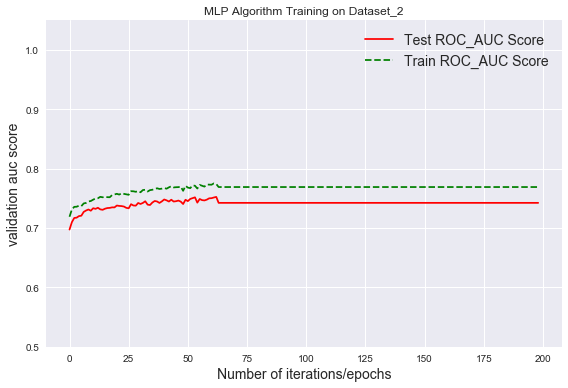

In [203]:
n_iterations(X_train_2, y_train_2, X_test_2, y_test_2, 200, 'MLP Algorithm Training on Dataset_2')